<a href="https://colab.research.google.com/github/prashantmane091318/ML/blob/main/Random_Forest_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.metrics import mean_squared_error


In [ ]:
data = np.random.uniform(0, 1,(1000, 1))
noise = np.random.normal(size=(1000,))
X = data[:,:1]
y = 10.0*(data[:,0]) + noise

Text(0.5, 1.0, 'Data')

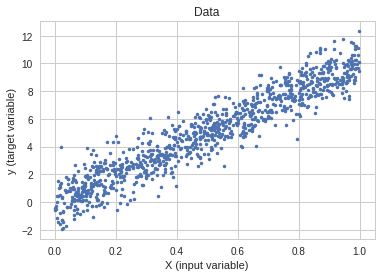

In [ ]:
plt.plot(X[:,0],y,'.')
plt.xlabel('X (input variable)')
plt.ylabel('y (target variable)')
plt.title("Data")

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=2019)

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_full_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_full_trees)
print("RF with full trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))


RF with full trees, Train MSE: 0.20093845861611537 Test MSE: 1.4140859568771276


In [ ]:
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=25)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_pruned_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

RF with pruned trees, Train MSE: 0.9081693127941253 Test MSE: 1.0472768284064544


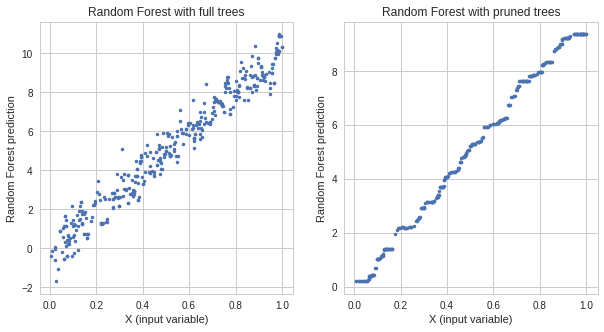

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(X_test[:,0], y_test_predicted_full_trees,'.')
plt.title("Random Forest with full trees")
plt.xlabel("X (input variable)")
plt.ylabel("Random Forest prediction")

plt.subplot(122)
plt.plot(X_test[:,0], y_test_predicted_pruned_trees,'.')
plt.title("Random Forest with pruned trees")
plt.xlabel("X (input variable)")
plt.ylabel("Random Forest prediction")
plt.show()

Iteration: 0 Train mse: 0.7509229868117977 Test mse: 1.7895291614210993
Iteration: 1 Train mse: 0.4253302499587355 Test mse: 1.610457745720873
Iteration: 2 Train mse: 0.4031350229482908 Test mse: 1.5931714198226197
Iteration: 3 Train mse: 0.3171243917205103 Test mse: 1.5168492117989933
Iteration: 4 Train mse: 0.3214109553120201 Test mse: 1.4349585102069813
Iteration: 5 Train mse: 0.26561774080096107 Test mse: 1.4550130766174567
Iteration: 6 Train mse: 0.27774419814816864 Test mse: 1.4259221679775078
Iteration: 7 Train mse: 0.22770467617558665 Test mse: 1.5026844324995505
Iteration: 8 Train mse: 0.22967057148458547 Test mse: 1.4693953926409051
Iteration: 9 Train mse: 0.22595183000050018 Test mse: 1.4952830398700625
Iteration: 10 Train mse: 0.22989007325469402 Test mse: 1.4164158037705625
Iteration: 11 Train mse: 0.22184333378651103 Test mse: 1.4691336140830538
Iteration: 12 Train mse: 0.2107968200820963 Test mse: 1.4796245981766862
Iteration: 13 Train mse: 0.2163191677906114 Test mse: 1

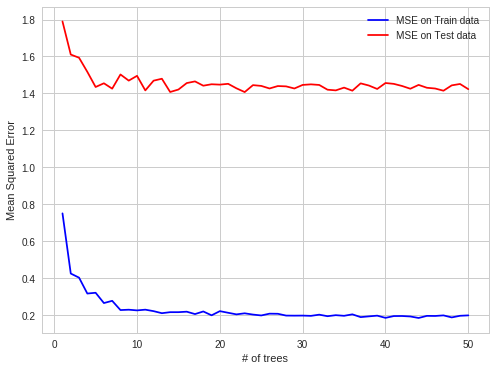

In [ ]:
rf = RandomForestRegressor(n_estimators=1)
trees, train_loss, test_loss = [], [], []
for iter in range(50):
  rf.fit(X_train, y_train)
  y_train_predicted = rf.predict(X_train)
  y_test_predicted = rf.predict(X_test)
  mse_train = mean_squared_error(y_train, y_train_predicted)
  mse_test = mean_squared_error(y_test, y_test_predicted)
  print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
  trees += [rf.n_estimators]
  train_loss += [mse_train]
  test_loss += [mse_test]
  rf.n_estimators += 1
plt.figure(figsize=(8,6))
plt.plot(trees, train_loss, color="blue", label="MSE on Train data")
plt.plot(trees, test_loss, color="red", label="MSE on Test data")
plt.xlabel("# of trees")
plt.ylabel("Mean Squared Error");
plt.legend()